# Student Performance

## Preprocessing

In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

In [116]:
data_path = "C:\\Users\\XZ374JM\\OneDrive - EY\\Desktop\\AI Academy\\Maci-Giacobbe-Buda-Meziane\\esercizio 21-08\\datasets\\student_performance\\Student_performance_data _.csv"

df = pd.read_csv(data_path)

In [117]:
print("The shape of the datset is:  ", df.shape)
 
# check for null values
print()
print('Null values:')
print(df.isnull().sum())
 
# check for duplicate rows
print()
print('Duplicated rows:')
print(df.duplicated().sum())
 

The shape of the datset is:   (2392, 15)

Null values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Duplicated rows:
0


In [118]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [119]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [120]:
print(df.columns)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [121]:
columns_to_drop = ['StudentID']

cat_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass']

num_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# drop unused columns
df_processed = df.drop(columns=columns_to_drop)

# encode categorical features
df_processed = pd.get_dummies(df_processed, columns=cat_features, drop_first=True)

# scale numerical features
scaler = StandardScaler()
df_processed[num_features] = scaler.fit_transform(df_processed[num_features])

In [122]:
df_processed.head()

,Age,StudyTimeWeekly,Absences,GPA,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,Tutoring_1,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,Extracurricular_1,Sports_1,Music_1,Volunteering_1,GradeClass_1.0,GradeClass_2.0,GradeClass_3.0,GradeClass_4.0
0,0.472919,1.780336,-0.890822,1.118086,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False
1,1.362944,0.997376,-1.717694,1.242374,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
2,-1.307132,-0.984045,1.353542,-1.960277,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,0.472919,0.045445,-0.063951,0.161790,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False
4,0.472919,-0.902311,0.290422,-0.675573,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True


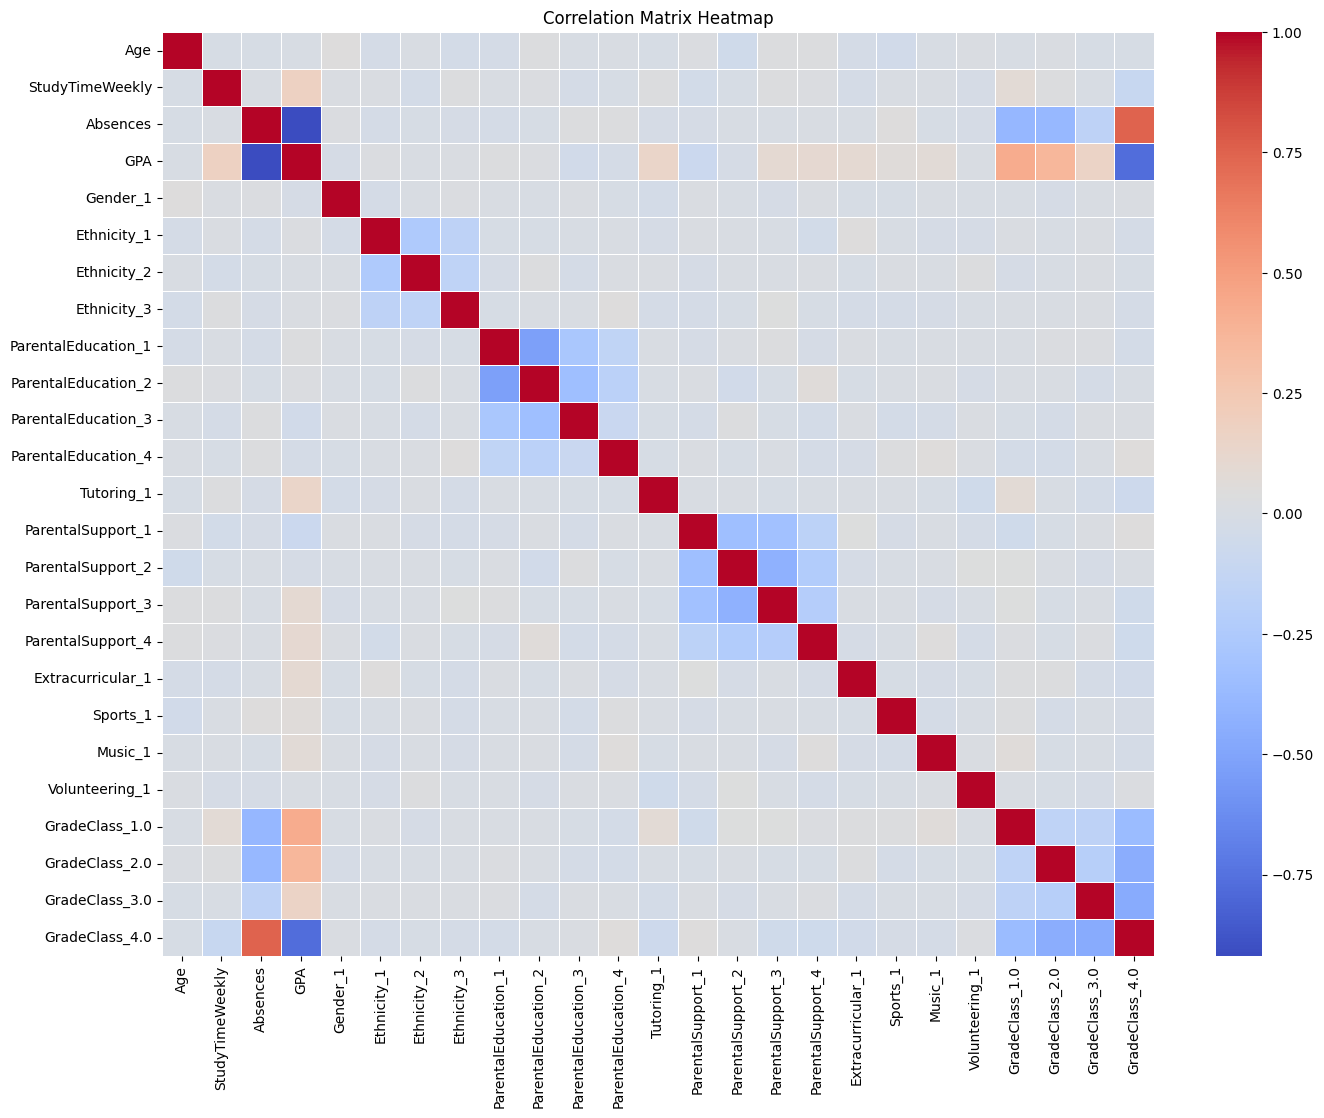

In [123]:
# correlation matrix
corr = df_processed.corr()

# visualiza correlation
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Supervised

Score di CV:
Media: 0.9612554983755333 
Std: 0.005140628982354936
Decision Tree:
              precision    recall  f1-score   support

           0      0.885     0.897     0.891       301
           1      0.894     0.882     0.888       297

    accuracy                          0.890       598
   macro avg      0.890     0.890     0.890       598
weighted avg      0.890     0.890     0.890       598



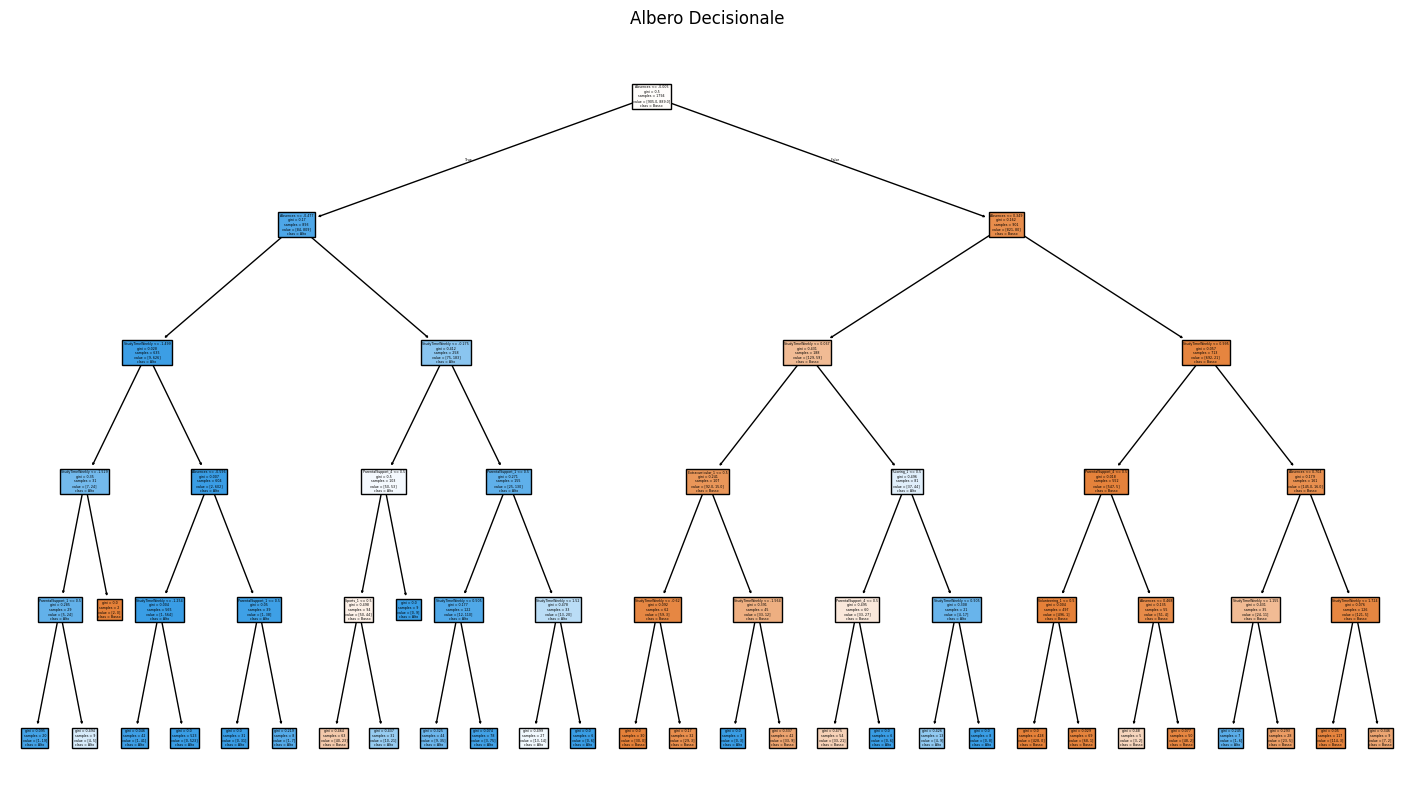

In [124]:
x = df_processed.drop(columns=['GradeClass_1.0', 'GradeClass_2.0', 'GradeClass_3.0', 'GradeClass_4.0', 'GPA'])
y = [0 if el <= 0 else 1 for el in df_processed['GPA']]

# PUNTO 2 - DECISION TREE
# K-Fold stratificato
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.25, random_state=42
)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
score = cross_val_score(tree, x, y, cv=skf, scoring="roc_auc")
print("Score di CV:\nMedia:",score.mean(),"\nStd:", score.std())

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, y_pred, digits=3))

plt.figure(figsize=(18, 10))
plot_tree(tree, feature_names=x.columns, class_names=["Basso","Alto"], filled=True)
plt.title("Albero Decisionale")
plt.show()

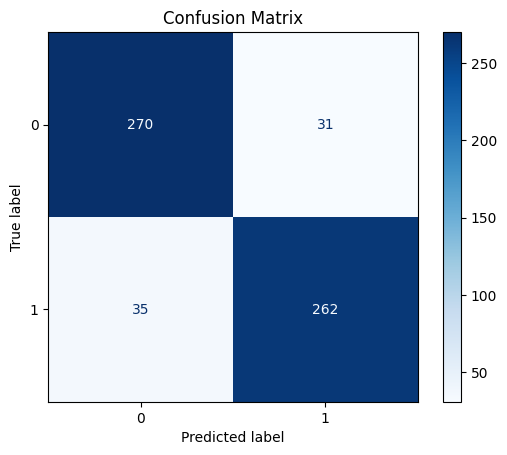

In [125]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Unsupervised: DBSCAN

DBSCAN_Cluster
2    630
3    593
0    587
1    582
Name: count, dtype: int64


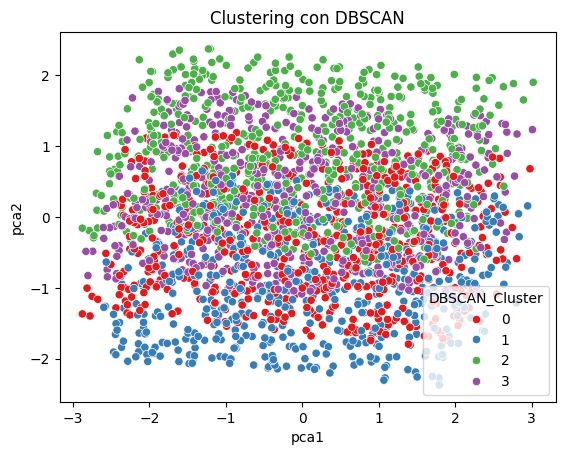

In [126]:
numeric_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

X_cluster =  df_processed[numeric_cols]
dbscan = DBSCAN(eps=0.8, min_samples=5)

df_processed['DBSCAN_Cluster'] = dbscan.fit_predict(X_cluster)
print(df_processed['DBSCAN_Cluster'].value_counts())

# visualizzazione dei cluster  //  riduzione della dimensionalita da 4 a 2 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
df_processed['pca1'] = X_pca[:,0]
df_processed['pca2'] = X_pca[:,1]

sns.scatterplot(data=df_processed, x='pca1', y='pca2', hue='DBSCAN_Cluster', palette='Set1')
plt.title("Clustering con DBSCAN")
plt.show()

KeyError: 'DBSCAN_Cluster'

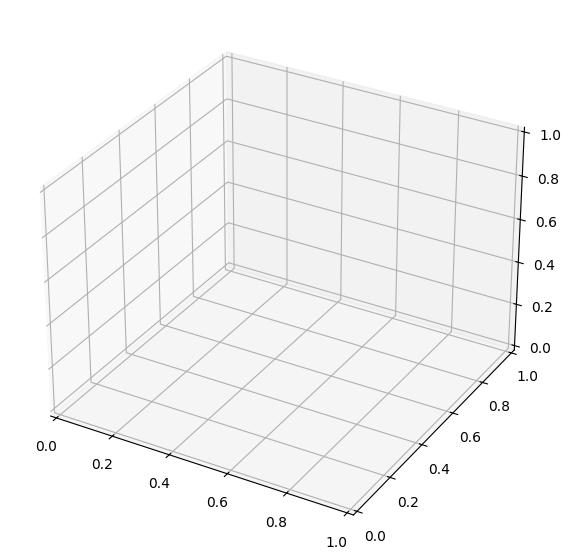

In [127]:
from mpl_toolkits.mplot3d import Axes3D


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_cluster)

df['pca1'] = X_pca3[:,0]
df['pca2'] = X_pca3[:,1]
df['pca3'] = X_pca3[:,2]

# Grafico 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['pca1'], df['pca2'], df['pca3'],
    c=df['DBSCAN_Cluster'], cmap='Set1', s=50
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("Clustering DBSCAN in 3D")

plt.colorbar(sc, label="Cluster")
ax.view_init(elev=20, azim=45)
plt.show()

## Unsupervised: KMeans

In [ ]:
BASE_COLORS = {
    0:"#1f77b4", 1:"#ff7f0e", 2:"#2ca02c", 3:"#d62728", 4:"#9467bd",
    5:"#8c564b", 6:"#e377c2", 7:"#7f7f7f", 8:"#bcbd22", 9:"#17becf"
}

pd.set_option("display.max_columns", None)

In [ ]:
# Scaling data to improve distance-based clustering
feat_for_clustering = ['StudyTimeWeekly', 'GPA', 'Absences'] 
feat_scaled = [f'SCALED_{feat}' for feat in feat_for_clustering] 
feat_to_plot = ['StudyTimeWeekly', 'GPA', 'Absences'] 


scaler = StandardScaler()
df[feat_scaled] = scaler.fit_transform(df[feat_for_clustering])
df[feat_scaled] = df[feat_scaled].to_numpy()

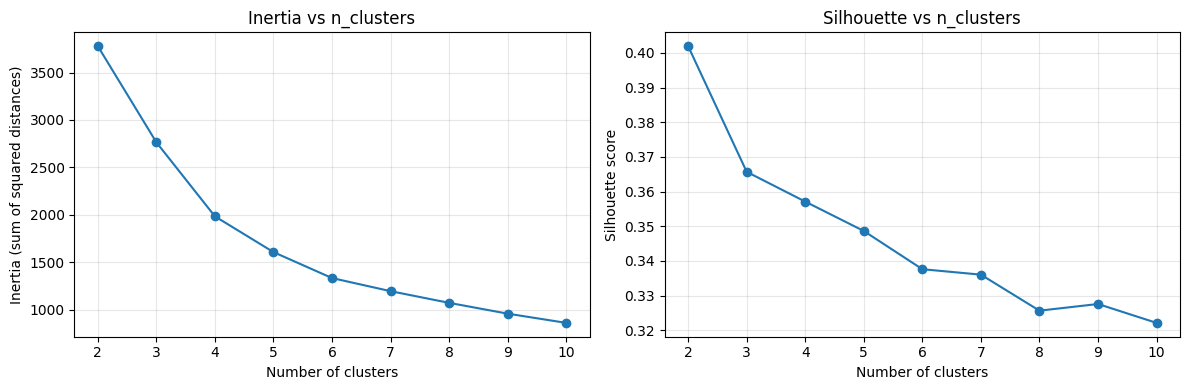

In [ ]:
# Analyze which n_cluster makes more sense with an elbow-curve approach
max_clusters_to_try = 10
ks = range(2, max_clusters_to_try+1)
inertias = []
silhouettes = []
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df[feat_scaled])
    # elbow with inertia:
    inertias.append(km.inertia_)
    # elbow with silhouette:
    silhouettes.append(silhouette_score(df[feat_scaled], km.fit_predict(df[feat_scaled])))

ks_sil = ks[1:] if len(silhouettes) == len(ks) - 1 else ks
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=False)
# Right plot: elbow with inertia
axes[0].plot(ks, inertias, marker="o")
axes[0].set_xticks(list(ks))
axes[0].set_xlabel("Number of clusters")
axes[0].set_ylabel("Inertia (sum of squared distances)")
axes[0].set_title("Inertia vs n_clusters")
axes[0].grid(True, alpha=0.3)
# Right plot: elbow with silhouettes
axes[1].plot(ks_sil, silhouettes, marker="o")
axes[1].set_xticks(list(ks_sil))
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Silhouette score")
axes[1].set_title("Silhouette vs n_clusters")
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


2 seems like the most reasonable number of clusters according to the elbow-graph.


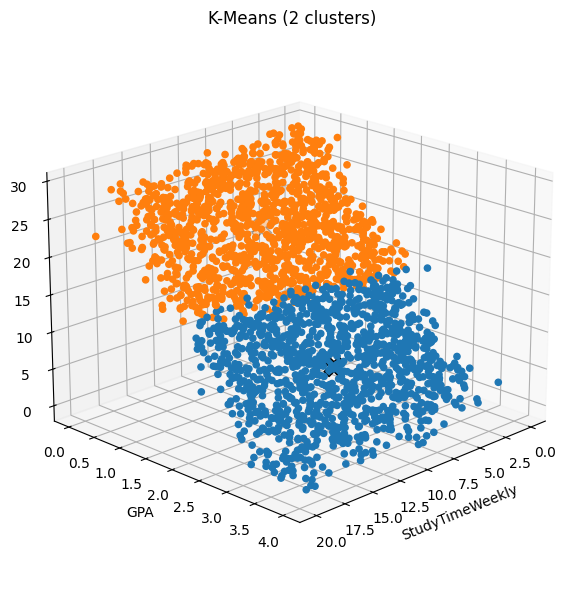


3 seems like the most reasonable number of clusters according to the elbow-graph.


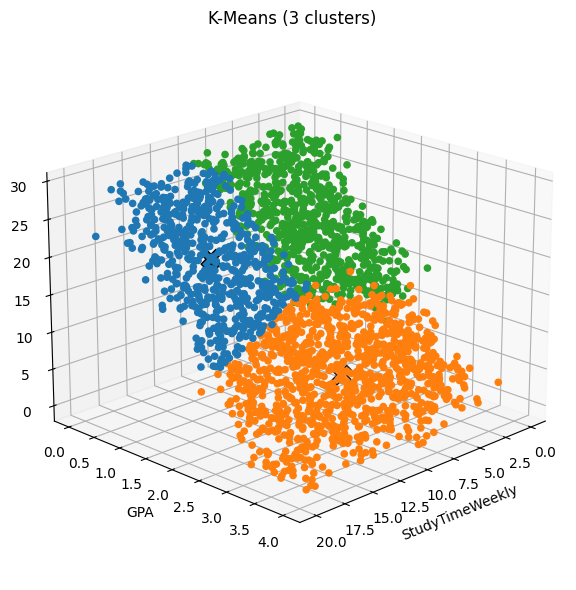

In [ ]:
# Silhouettes-Elbow curve shows which be the most reasonable number of clusters for this population.
best_clusters_silhouettes = sorted(
    [(i + 2, s) for i, s in enumerate(silhouettes)],
    key=lambda t: t[1],          # sort by the score
    reverse=True                 # highest first
)

amount_of_cluster_plots = 2
for ii in range(amount_of_cluster_plots):

  n_clusters = best_clusters_silhouettes[ii][0]
  print(f"\n{n_clusters} seems like the most reasonable number of clusters according to the elbow-graph.")
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
  df["km_label"] = kmeans.fit_predict(df[feat_scaled])

  # Plot of the clusters
  labels = df["km_label"].to_numpy()
  X_to_plot = df[feat_to_plot].to_numpy()  # original units for nicer axes
  centers = scaler.inverse_transform(kmeans.cluster_centers_)
  cluster_colors = {int(c): BASE_COLORS[int(c) % 10] for c in np.unique(labels)}

#fix?
#########################
  centers_orig_df = pd.DataFrame(
      scaler.inverse_transform(kmeans.cluster_centers_),
      columns=feat_for_clustering
  )
  C_to_plot = centers_orig_df[feat_to_plot].to_numpy()
#########################

  
  if len(feat_to_plot) >= 3:
      # -------- 3D PLOT --------
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection="3d")

    # points
    point_colors = [cluster_colors[int(c)] for c in labels]
    ax.scatter(X_to_plot[:, 0], X_to_plot[:, 1], X_to_plot[:, 2], c=point_colors, s=20, depthshade=False)

    # centers

    center_colors = [cluster_colors[i] for i in range(n_clusters)]
    ax.scatter(C_to_plot[:, 0], C_to_plot[:, 1], C_to_plot[:, 2],             # <<< CHANGED (use C_to_plot, not raw centers[:, :3])
               c=center_colors, s=200, marker="X", edgecolor="k")
    """
    center_colors = [cluster_colors[i] for i in range(n_clusters)]
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
                c=center_colors, s=200, marker="X", edgecolor="k")
    """

    ax.set_xlabel(feat_to_plot[0])
    ax.set_ylabel(feat_to_plot[1])
    ax.set_zlabel(feat_to_plot[2])
    ax.set_title(f"K-Means ({n_clusters} clusters)")

    plt.tight_layout()
    plt.show()

  else:
      # -------- 2D PLOT (your original) --------
      plt.figure(figsize=(6,6))
      point_colors = [cluster_colors[int(c)] for c in labels]
      plt.scatter(X_to_plot[:,0], X_to_plot[:,1], c=point_colors, s=25)
      center_colors = [cluster_colors[i] for i in range(n_clusters)]
      plt.scatter(centers[:,0], centers[:,1], c=center_colors,
                  s=200, marker="X", edgecolor="k")
      plt.xlabel(feat_for_clustering[0]); plt.ylabel(feat_for_clustering[1])
      plt.tight_layout()
      plt.show()

  # ---- Distance to cluster centroid (works for 2D or 3D+) ----
  # centers[df["km_label"]] uses advanced indexing; make sure labels are int
  df["dist_from_centroids"] = np.linalg.norm(
      df[feat_for_clustering].to_numpy() - centers[labels], axis=1
  )